In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append("../30_Source")

In [3]:
from pprint import pprint
from CwnGraph import CwnBase, CwnSense
from SenseGran import cwn_sense_utils as utils
import numpy as np
from flair.embeddings import BertEmbeddings, Sentence

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [4]:
cwn = CwnBase()
car_senses = cwn.find_senses("^汽$")

# Examples of "汽"

In [5]:
examples = {sense_x.id: sense_x.all_examples() for sense_x in car_senses if sense_x.examples}

In [6]:
pprint(examples)
utils.report_examples(examples)

{'07077301': ['塔內<汽>、液體能夠從窗口自由通過，填料層內的<汽>、液體分佈較改善。',
              '牙醫師也怕被傳染，所以器具會用高壓<汽>消毒，所以，治療牙週病不必恐慌會得愛滋病。',
              '據描述當時的情況稱：轟的一聲炸雷般巨響，發生了驚天動地的爆炸，頓時間磚石、鐵皮和液化<汽>鋼瓶夾著火團在空中橫飛。'],
 '07077302': ['用B液沖去殘留的水，再加B液於玻片上，微火加熱至微冒<汽>。',
              '灶台裡邊的大鍋正燒著滾燙的水，白<汽>從鍋蓋邊沿滋滋地竄出。',
              '如果用摩卡壺煮咖啡煮到一半，壺身旁有個小孔不斷地冒<汽>，正常嗎？'],
 '09004101': ['本校<汽>、機車管理單位為總務處、學務處及進修部。',
              '本公司只銷售絕佳、優質、平價有口皆碑的<汽>、貨車。',
              '<汽>修知識大全，目前全國最大最全的<汽>修知識資料庫。'],
 '09004102': ['國光號跟竹<汽>是同一家。',
              '坊間傳出北<汽>將兼併福<汽>。',
              '自上<汽>入主以後，05、06年都虧損的韓國雙龍07年終於實現了小幅盈利。'],
 '09004103': ['今天跟<汽>二乙的學弟們出遊。',
              '以下為<汽>一學生重補修分科總表。',
              '92年12月30日：至埔里弔唁<汽>三甲學生袁鈺濬。'],
 '09004104': ['中國<汽>柴煤三油午夜齊漲價。',
              '鈴木與通用將聯合研製<汽>電混合動力車。',
              '中油剛剛宣布調漲國內<汽>、柴油批售價格。']}
gather 18 examples from 6 senses


In [7]:
bert = BertEmbeddings('bert-base-chinese', layers='-1,-2,-3,-4', pooling_operation='mean')

In [8]:
sense_data = utils.compute_sense_data(examples, bert)
pprint(sense_data)

{'07077301': SenseExamples(target_map={0: [1, 3], 1: [1], 2: [1]}, sentences=[Sentence: "塔內 汽 、液體能夠從窗口自由通過，填料層內的 汽 、液體分佈較改善。" - 5 Tokens, Sentence: "牙醫師也怕被傳染，所以器具會用高壓 汽 消毒，所以，治療牙週病不必恐慌會得愛滋病。" - 3 Tokens, Sentence: "據描述當時的情況稱：轟的一聲炸雷般巨響，發生了驚天動地的爆炸，頓時間磚石、鐵皮和液化 汽 鋼瓶夾著火團在空中橫飛。" - 3 Tokens], embeddings=tensor([[ 0.4196, -0.9367, -1.0510,  ..., -0.3137,  0.3921,  0.4001],
        [ 1.1904, -0.1677, -1.0397,  ..., -0.4225, -0.8640,  0.1903],
        [-0.1437, -0.5289, -1.3513,  ..., -0.2916, -0.1796,  0.7723]])),
 '07077302': SenseExamples(target_map={0: [1], 1: [1], 2: [1]}, sentences=[Sentence: "用B液沖去殘留的水，再加B液於玻片上，微火加熱至微冒 汽 。" - 3 Tokens, Sentence: "灶台裡邊的大鍋正燒著滾燙的水，白 汽 從鍋蓋邊沿滋滋地竄出。" - 3 Tokens, Sentence: "如果用摩卡壺煮咖啡煮到一半，壺身旁有個小孔不斷地冒 汽 ，正常嗎？" - 3 Tokens], embeddings=tensor([[-0.7853, -0.7176, -1.0279,  ..., -0.8762, -1.0522, -0.5165],
        [ 0.7715, -0.7150, -0.7439,  ...,  0.2167, -0.2240, -0.4655],
        [ 0.1171, -0.6269, -0.5519,  ..., -0.8454, -0.4986, -0.3884]])),
 '09004101': SenseExa

In [9]:
stats = utils.compute_statistics(sense_data)
def format_f_stat(stats):
    df1, df2, Fstat = stats[1]
    pval = stats[0]
    return f"F({df1}, {df2}) = {Fstat:.2f}, p = {pval:0.4f}"
print(format_f_stat(stats))

F(5, 12) = 2.83, p = 0.0647


# Sense embedding in other lemmas

In [10]:
lemmas = ["汽車", "汽", "車", "梅花", "梅", "花", "電腦", "電", "腦"]
for lemma_x in lemmas:
    stat_x = utils.make_bert_statistics(lemma_x, cwn, bert)
    if not stat_x: continue
    stat_dbg = utils.make_bert_statistics(lemma_x, cwn, bert, debug=True)
    print(f"[BERT] {lemma_x}: {format_f_stat(stat_x)}")
    print(f"[RAND] {lemma_x}: {format_f_stat(stat_dbg)}")

[BERT] 汽車: F(2, 7) = 3.44, p = 0.0912
[RAND] 汽車: F(2, 7) = 0.99, p = 0.4169
[BERT] 汽: F(5, 12) = 2.83, p = 0.0647
[RAND] 汽: F(5, 12) = 1.00, p = 0.4606
[BERT] 車: F(9, 22) = 2.75, p = 0.0255
[RAND] 車: F(9, 22) = 1.01, p = 0.4621
[BERT] 梅花: F(0, 6) = nan, p = nan
[RAND] 梅花: F(0, 6) = nan, p = nan
[BERT] 梅: F(4, 12) = 2.84, p = 0.0718
[RAND] 梅: F(4, 12) = 1.01, p = 0.4381
[BERT] 花: F(14, 33) = 3.33, p = 0.0022
[RAND] 花: F(14, 33) = 1.01, p = 0.4668
[BERT] 電腦: F(2, 7) = 2.19, p = 0.1826
[RAND] 電腦: F(2, 7) = 1.36, p = 0.3172
[BERT] 電: F(7, 16) = 4.89, p = 0.0041
[RAND] 電: F(7, 16) = 1.01, p = 0.4625
[BERT] 腦: F(5, 13) = 2.44, p = 0.0904
[RAND] 腦: F(5, 13) = 1.00, p = 0.4560


In [11]:
utils.make_bert_statistics("停", cwn, bert)

(0.027867271198391275, (8, 18, 2.9259276268523595))

# Distance between synset embeddings

In [12]:
syn1_ids, syn1_emb = utils.compute_sense_embedding("花", cwn, bert)

In [13]:
syn2_ids, syn2_emb = utils.compute_sense_embedding("開花", cwn, bert)

In [14]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

<CwnSense[05229001](花): 植物的主要器官之一，主要用於繁殖，通常具有顏色鮮豔和形狀漂亮的花瓣。>, <CwnSense[09308901](開花): 形容有花植物的花朵長出並舒展。>


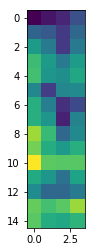

In [15]:
dist_mat = cdist(syn1_emb, syn2_emb, "euclidean")
plt.imshow(dist_mat)
s1_id, s2_id = np.unravel_index(np.argmin(dist_mat), dist_mat.shape)
s1 = cwn.from_sense_id(syn1_ids[s1_id])
s2 = cwn.from_sense_id(syn2_ids[s2_id])
print(f"{s1}, {s2}")

In [22]:
utils.connect_lemma("花", "花費", cwn, bert, n=5)

[((<CwnSense[06031401](花): 消耗物品或能量去換取其他等值特定對象。>,
   <CwnSense[05064901](花費): 消耗物品或能量去換取其他等值特定對象。>),
  19.892921351815172),
 ((<CwnSense[06031401](花): 消耗物品或能量去換取其他等值特定對象。>,
   <CwnSense[05064902](花費): 用於換取等值特定對象的金錢。>),
  25.422061774399552),
 ((<CwnSense[05229007](花): 形容因眼睛看到多而繁雜的事物，而無法辨識清楚。>,
   <CwnSense[05064901](花費): 消耗物品或能量去換取其他等值特定對象。>),
  35.21227453461591),
 ((<CwnSense[05229008](花): 形容物體表面有刮痕或因磨損而不平滑。>,
   <CwnSense[05064901](花費): 消耗物品或能量去換取其他等值特定對象。>),
  35.21330694518948),
 ((<CwnSense[05229003](花): 形容顏色混雜交錯的。>,
   <CwnSense[05064902](花費): 用於換取等值特定對象的金錢。>),
  35.64884446498777)]

In [17]:
utils.make_bert_statistics("花費", cwn, bert)

(0.21059901476946763, (1, 10, 1.7896215856551676))

In [18]:
cwn.from_sense_id("06031401").all_examples()

['他們只是參與過整個訪談，對作品多<花>了一點時間去瞭解。',
 '過了幾天，人走動頻繁就灰飛煙滅了，無論多細緻及<花>了多少心血。',
 '不<花>腦筋的喜劇能投其所好，也因此甚有口碑的製作人朱朱兩檔新戲希望之歌。',
 '那些日子裡，真可以說是步步驚魂，幾乎是把所有的力氣，把整個的童年，都<花>在追趕別人步伐。',
 '隨便罰，沒關係，我現在錢太多了<花>不完。',
 '她說：「給我錢也不能<花>，有什麼意思。」她的期望不在這裡。',
 '煉鋼得不償失。用那麼多的人，<花>那麼多的錢，賬不算是不行的。']

In [19]:
cwn.from_sense_id("05064901").all_examples()

['總統對中油努力探勘油源所<花費>的心力，表示肯定。',
 '因為資訊實在太多，即使走馬看花，也要<花費>不少時間。',
 '薄薄的一張證明，又不需要<花費>很大人力，卻要索價三百元。',
 '第一階段選擇場址評估約需<花費>一千五百萬元。',
 'IBM相當重視研究開發，每年<花費>在此方面的經費不下數十億美元。',
 '整體經營與制度化，導致包括交通、住宿及其他<花費>的資金，大多未能流入當地社會。',
 '職業訓練是投資，而不是<花費>。',
 '只要有興趣，就不會在乎金錢上的<花費>。',
 '計有卅八宗個案，<花費>金額為四十六萬五千五百廿五元。']

In [20]:
cwn.from_sense_id("05064901").relations

[('has_facet', <CwnFacet[0506490101](花費): 消耗後述時間或能量。>),
 ('has_facet', <CwnFacet[0506490102](花費): 付出金錢。>),
 ('has_facet', <CwnFacet[0506490103](花費): 付出金錢。>),
 ('is_synset', <CwnSense[syn_014948](----): >),
 ('synonym(rev)', <CwnSense[04017403](用): 付出金錢。>),
 ('synonym(rev)', <CwnFacet[0603140101](花): 消耗後述時間或能量。>),
 ('synonym(rev)', <CwnFacet[0603140102](花): 付出金錢。>),
 ('synonym(rev)', <CwnSense[06560204](使): 付出金錢。>),
 ('synonym(rev)', <CwnFacet[0516770101](費): 消耗後述時間或能量。>),
 ('synonym(rev)', <CwnFacet[0516770102](費): 付出金錢。>),
 ('synonym(rev)', <CwnFacet[0667200101](花錢): 付出金錢。>),
 ('synonym(rev)', <CwnFacet[0667200102](花錢): 付出金錢。>),
 ('synonym(rev)', <CwnSense[06721068](開): 付出金錢。>),
 ('synonym(rev)', <CwnSense[06685715](投): 比喻付出金錢。>),
 ('synonym(rev)', <CwnFacet[0672240201](使用): 付出金錢。>),
 ('synonym(rev)', <CwnFacet[0672240202](使用): 付出金錢。>),
 ('synonym(rev)', <CwnSense[06552802](投入): 比喻付出金錢。>),
 ('hypernym(rev)', <CwnSense[09012702](斥): 付出金錢，通常數目較大。>)]

## test that segmentation doesn't matter in BERT

In [51]:
ss0 = bert.embed([Sentence("我 開 車 去 修"), Sentence("我開 車 去修")])

In [52]:
print(ss0[0][2], ss0[0][2].embedding)
print(ss0[1][1], ss0[1][1].embedding)

Token: 3 車 tensor([-0.1314, -0.2001, -0.2039,  ...,  0.7550, -0.4735,  0.4817])
Token: 2 車 tensor([-0.1314, -0.2001, -0.2039,  ...,  0.7550, -0.4735,  0.4817])
